In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
data = pd.read_csv('/content/Customers.csv')

In [282]:
data.head()

,CustomerKey,Prefix,FirstName,LastName,Unnamed: 4,Unnamed: 5,Unnamed: 6,BirthDate,Unnamed: 8,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Unnamed: 17,Unnamed: 18,BirthDate.1
0,11000,MR.,JON,YANG,MR. JON YANG,YANG,YANG,4/8/1966,NaN,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y,NaN,NaN,14-05-1965
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,HUANG,HUANG,14/05/1965,NaN,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N,NaN,NaN,15-02-1968
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,TORRES,TORRES,8/12/1965,NaN,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y,NaN,NaN,NaN
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,ZHU,ZHU,15/02/1968,NaN,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N,NaN,NaN,NaN
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,JOHNSON,JOHNSON,8/8/1968,NaN,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y,NaN,NaN,NaN


<h2> Data Cleaning

In [283]:
data.columns

Index(['CustomerKey', 'Prefix', 'FirstName', 'LastName', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'BirthDate', 'Unnamed: 8', 'MaritalStatus',
       'Gender', 'EmailAddress', 'AnnualIncome', 'TotalChildren',
       'EducationLevel', 'Occupation', 'HomeOwner', 'Unnamed: 17',
       'Unnamed: 18', 'BirthDate.1'],
      dtype='object')

In [284]:
w =['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 17', 'Unnamed: 18', 'BirthDate.1']

In [285]:
data.drop(w, axis = 1 , inplace = True)

In [286]:
data.head(3)

,CustomerKey,Prefix,FirstName,LastName,Unnamed: 4,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,MR. JON YANG,4/8/1966,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y


In [287]:
data.rename(columns = {'Unnamed: 4' : 'Full Names'}, inplace = True)

In [288]:
data

,CustomerKey,Prefix,FirstName,LastName,Full Names,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,MR. JON YANG,4/8/1966,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,15/02/1968,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,8/8/1968,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,MR.,TOMMY,TANG,MR. TOMMY TANG,7/4/1958,M,M,tommy2@learnsector.com,"$30,000",1,Graduate Degree,Clerical,Y
18144,29480,MRS.,NINA,RAJI,MRS. NINA RAJI,11/10/1960,S,F,nina21@learnsector.com,"$30,000",3,Graduate Degree,Clerical,Y
18145,29481,MR.,IVAN,SURI,MR. IVAN SURI,1/5/1960,S,M,ivan0@learnsector.com,"$30,000",3,Graduate Degree,Clerical,N
18146,29482,MR.,CLAYTON,ZHANG,MR. CLAYTON ZHANG,3/5/1959,M,M,clayton0@learnsector.com,"$30,000",3,Bachelors,Clerical,Y


<h2> Data Cleaning

In [289]:
data.MaritalStatus = data.MaritalStatus.replace('M', 'Married')
data.MaritalStatus = data.MaritalStatus.replace('S', 'Single')
data.Gender = data.Gender.replace('M', 'Male')
data.Gender = data.Gender.replace('F', 'Female')
data.HomeOwner = data.HomeOwner.replace('Y', 'Yes')
data.HomeOwner = data.HomeOwner.replace('N', 'No')
data

,CustomerKey,Prefix,FirstName,LastName,Full Names,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,MR. JON YANG,4/8/1966,Married,Male,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Yes
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,Single,Male,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,No
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,Married,Male,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Yes
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,15/02/1968,Single,Female,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,No
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,8/8/1968,Single,Female,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,MR.,TOMMY,TANG,MR. TOMMY TANG,7/4/1958,Married,Male,tommy2@learnsector.com,"$30,000",1,Graduate Degree,Clerical,Yes
18144,29480,MRS.,NINA,RAJI,MRS. NINA RAJI,11/10/1960,Single,Female,nina21@learnsector.com,"$30,000",3,Graduate Degree,Clerical,Yes
18145,29481,MR.,IVAN,SURI,MR. IVAN SURI,1/5/1960,Single,Male,ivan0@learnsector.com,"$30,000",3,Graduate Degree,Clerical,No
18146,29482,MR.,CLAYTON,ZHANG,MR. CLAYTON ZHANG,3/5/1959,Married,Male,clayton0@learnsector.com,"$30,000",3,Bachelors,Clerical,Yes


In [290]:
data.drop('Prefix', axis=1, inplace = True)

In [291]:
data

,CustomerKey,FirstName,LastName,Full Names,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,JON,YANG,MR. JON YANG,4/8/1966,Married,Male,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Yes
1,11001,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,Single,Male,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,No
2,11002,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,Married,Male,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Yes
3,11003,CHRISTY,ZHU,MS. CHRISTY ZHU,15/02/1968,Single,Female,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,No
4,11004,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,8/8/1968,Single,Female,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,TOMMY,TANG,MR. TOMMY TANG,7/4/1958,Married,Male,tommy2@learnsector.com,"$30,000",1,Graduate Degree,Clerical,Yes
18144,29480,NINA,RAJI,MRS. NINA RAJI,11/10/1960,Single,Female,nina21@learnsector.com,"$30,000",3,Graduate Degree,Clerical,Yes
18145,29481,IVAN,SURI,MR. IVAN SURI,1/5/1960,Single,Male,ivan0@learnsector.com,"$30,000",3,Graduate Degree,Clerical,No
18146,29482,CLAYTON,ZHANG,MR. CLAYTON ZHANG,3/5/1959,Married,Male,clayton0@learnsector.com,"$30,000",3,Bachelors,Clerical,Yes


<h2> Filling of Empty Data

In [292]:
data.isna().sum()

CustomerKey         0
FirstName           0
LastName            0
Full Names          0
BirthDate           0
MaritalStatus       0
Gender            130
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
dtype: int64

In [293]:
data.fillna(data.dtypes.replace({'object': 'Females'}),inplace = True)
data

,CustomerKey,FirstName,LastName,Full Names,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,JON,YANG,MR. JON YANG,4/8/1966,Married,Male,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Yes
1,11001,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,Single,Male,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,No
2,11002,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,Married,Male,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Yes
3,11003,CHRISTY,ZHU,MS. CHRISTY ZHU,15/02/1968,Single,Female,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,No
4,11004,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,8/8/1968,Single,Female,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,TOMMY,TANG,MR. TOMMY TANG,7/4/1958,Married,Male,tommy2@learnsector.com,"$30,000",1,Graduate Degree,Clerical,Yes
18144,29480,NINA,RAJI,MRS. NINA RAJI,11/10/1960,Single,Female,nina21@learnsector.com,"$30,000",3,Graduate Degree,Clerical,Yes
18145,29481,IVAN,SURI,MR. IVAN SURI,1/5/1960,Single,Male,ivan0@learnsector.com,"$30,000",3,Graduate Degree,Clerical,No
18146,29482,CLAYTON,ZHANG,MR. CLAYTON ZHANG,3/5/1959,Married,Male,clayton0@learnsector.com,"$30,000",3,Bachelors,Clerical,Yes


In [294]:
data.isna().sum()

CustomerKey       0
FirstName         0
LastName          0
Full Names        0
BirthDate         0
MaritalStatus     0
Gender            0
EmailAddress      0
AnnualIncome      0
TotalChildren     0
EducationLevel    0
Occupation        0
HomeOwner         0
dtype: int64

<h2> Conversion of Annual Income to Integer

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18148 non-null  int64 
 1   FirstName       18148 non-null  object
 2   LastName        18148 non-null  object
 3   Full Names      18148 non-null  object
 4   BirthDate       18148 non-null  object
 5   MaritalStatus   18148 non-null  object
 6   Gender          18148 non-null  object
 7   EmailAddress    18148 non-null  object
 8   AnnualIncome    18148 non-null  object
 9   TotalChildren   18148 non-null  int64 
 10  EducationLevel  18148 non-null  object
 11  Occupation      18148 non-null  object
 12  HomeOwner       18148 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.8+ MB


In [296]:
data.AnnualIncome.str.strip('$')
data.AnnualIncome = data.AnnualIncome.str.strip('$')
data

,CustomerKey,FirstName,LastName,Full Names,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,JON,YANG,MR. JON YANG,4/8/1966,Married,Male,jon24@learnsector.com,"90,000",2,Bachelors,Professional,Yes
1,11001,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,Single,Male,eugene10@learnsector.com,"60,000",3,Bachelors,Professional,No
2,11002,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,Married,Male,ruben35@learnsector.com,"60,000",3,Bachelors,Professional,Yes
3,11003,CHRISTY,ZHU,MS. CHRISTY ZHU,15/02/1968,Single,Female,christy12@learnsector.com,"70,000",0,Bachelors,Professional,No
4,11004,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,8/8/1968,Single,Female,elizabeth5@learnsector.com,"80,000",5,Bachelors,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,TOMMY,TANG,MR. TOMMY TANG,7/4/1958,Married,Male,tommy2@learnsector.com,"30,000",1,Graduate Degree,Clerical,Yes
18144,29480,NINA,RAJI,MRS. NINA RAJI,11/10/1960,Single,Female,nina21@learnsector.com,"30,000",3,Graduate Degree,Clerical,Yes
18145,29481,IVAN,SURI,MR. IVAN SURI,1/5/1960,Single,Male,ivan0@learnsector.com,"30,000",3,Graduate Degree,Clerical,No
18146,29482,CLAYTON,ZHANG,MR. CLAYTON ZHANG,3/5/1959,Married,Male,clayton0@learnsector.com,"30,000",3,Bachelors,Clerical,Yes


In [297]:
data.AnnualIncome.str.replace(',', '')
data.AnnualIncome = data.AnnualIncome.str.replace(',', '')
data

,CustomerKey,FirstName,LastName,Full Names,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,JON,YANG,MR. JON YANG,4/8/1966,Married,Male,jon24@learnsector.com,90000,2,Bachelors,Professional,Yes
1,11001,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,Single,Male,eugene10@learnsector.com,60000,3,Bachelors,Professional,No
2,11002,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,Married,Male,ruben35@learnsector.com,60000,3,Bachelors,Professional,Yes
3,11003,CHRISTY,ZHU,MS. CHRISTY ZHU,15/02/1968,Single,Female,christy12@learnsector.com,70000,0,Bachelors,Professional,No
4,11004,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,8/8/1968,Single,Female,elizabeth5@learnsector.com,80000,5,Bachelors,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,TOMMY,TANG,MR. TOMMY TANG,7/4/1958,Married,Male,tommy2@learnsector.com,30000,1,Graduate Degree,Clerical,Yes
18144,29480,NINA,RAJI,MRS. NINA RAJI,11/10/1960,Single,Female,nina21@learnsector.com,30000,3,Graduate Degree,Clerical,Yes
18145,29481,IVAN,SURI,MR. IVAN SURI,1/5/1960,Single,Male,ivan0@learnsector.com,30000,3,Graduate Degree,Clerical,No
18146,29482,CLAYTON,ZHANG,MR. CLAYTON ZHANG,3/5/1959,Married,Male,clayton0@learnsector.com,30000,3,Bachelors,Clerical,Yes


In [298]:
data.AnnualIncome.astype(int)
data

,CustomerKey,FirstName,LastName,Full Names,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,JON,YANG,MR. JON YANG,4/8/1966,Married,Male,jon24@learnsector.com,90000,2,Bachelors,Professional,Yes
1,11001,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,Single,Male,eugene10@learnsector.com,60000,3,Bachelors,Professional,No
2,11002,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,Married,Male,ruben35@learnsector.com,60000,3,Bachelors,Professional,Yes
3,11003,CHRISTY,ZHU,MS. CHRISTY ZHU,15/02/1968,Single,Female,christy12@learnsector.com,70000,0,Bachelors,Professional,No
4,11004,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,8/8/1968,Single,Female,elizabeth5@learnsector.com,80000,5,Bachelors,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,TOMMY,TANG,MR. TOMMY TANG,7/4/1958,Married,Male,tommy2@learnsector.com,30000,1,Graduate Degree,Clerical,Yes
18144,29480,NINA,RAJI,MRS. NINA RAJI,11/10/1960,Single,Female,nina21@learnsector.com,30000,3,Graduate Degree,Clerical,Yes
18145,29481,IVAN,SURI,MR. IVAN SURI,1/5/1960,Single,Male,ivan0@learnsector.com,30000,3,Graduate Degree,Clerical,No
18146,29482,CLAYTON,ZHANG,MR. CLAYTON ZHANG,3/5/1959,Married,Male,clayton0@learnsector.com,30000,3,Bachelors,Clerical,Yes


In [299]:
data.AnnualIncome = data.AnnualIncome.astype(int)

In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18148 non-null  int64 
 1   FirstName       18148 non-null  object
 2   LastName        18148 non-null  object
 3   Full Names      18148 non-null  object
 4   BirthDate       18148 non-null  object
 5   MaritalStatus   18148 non-null  object
 6   Gender          18148 non-null  object
 7   EmailAddress    18148 non-null  object
 8   AnnualIncome    18148 non-null  int64 
 9   TotalChildren   18148 non-null  int64 
 10  EducationLevel  18148 non-null  object
 11  Occupation      18148 non-null  object
 12  HomeOwner       18148 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.8+ MB


<h2>Bar chart showing the count of customers by MaritalStatus.


In [301]:
data.MaritalStatus.value_counts()

Married    9817
Single     8331
Name: MaritalStatus, dtype: int64

In [302]:
data.MaritalStatus.value_counts().reset_index()

,index,MaritalStatus
0,Married,9817
1,Single,8331


Text(0, 0.5, 'Status')

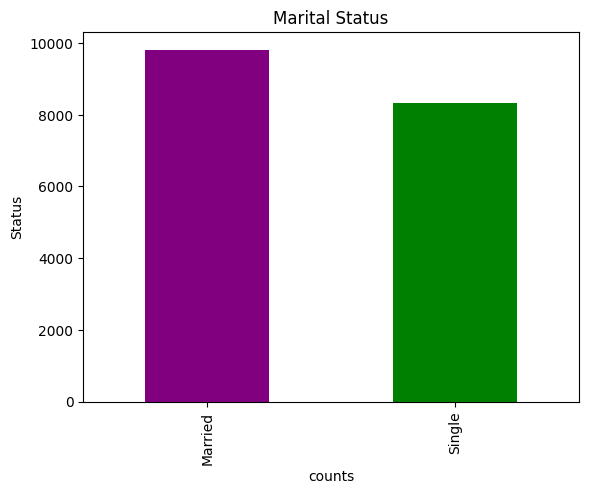

In [303]:
data.MaritalStatus.value_counts().plot(kind = 'bar', color = ['purple', 'green'])
plt.title('Marital Status')
plt.xlabel('counts')
plt.ylabel('Status')



<H2>Visualization of proportion of customers by Gender





Text(0.5, 1.0, 'Gender Distribution')

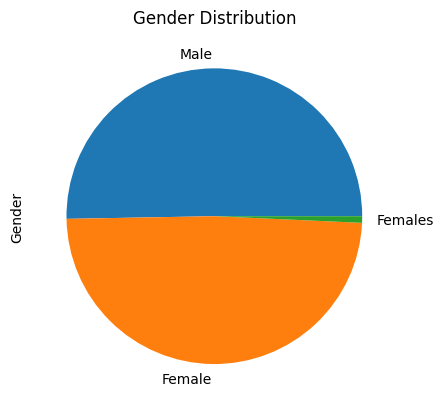

In [304]:
data.Gender.value_counts().plot(kind = 'pie')
plt.title('Gender Distribution')

<h2>           Annual Income Visualization

Text(0, 0.5, 'Income')

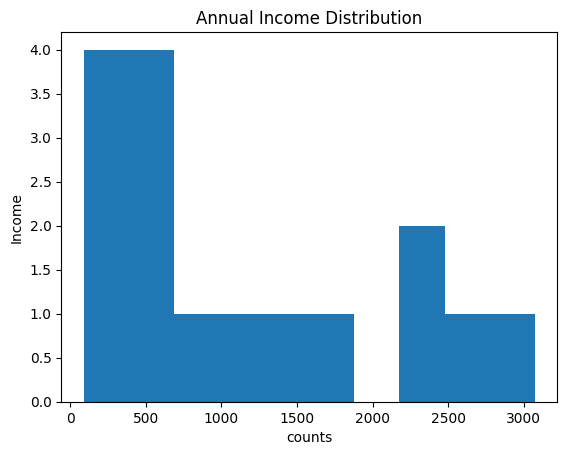

In [305]:
data.AnnualIncome.value_counts().plot(kind = 'hist')
plt.title('Annual Income Distribution')
plt.xlabel('counts')
plt.ylabel('Income')

Text(0, 0.5, 'Income')

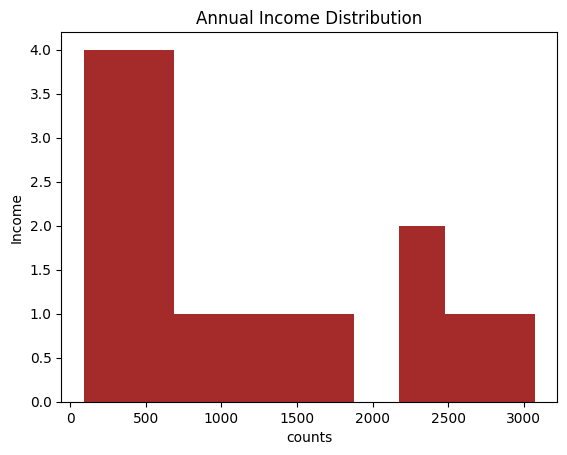

In [306]:
data.AnnualIncome.value_counts().plot(kind = 'hist', color = ['brown'])
plt.title('Annual Income Distribution')
plt.xlabel('counts')
plt.ylabel('Income')

In [307]:
data.AnnualIncome.value_counts()

60000     3072
40000     2688
70000     2313
30000     2236
20000     1745
80000     1325
10000     1135
90000      830
50000      661
100000     559
130000     501
110000     459
120000     324
170000     109
150000     100
160000      91
Name: AnnualIncome, dtype: int64

<h2> Total Children by Educational Level

In [308]:
data.groupby(['TotalChildren','EducationLevel']).size()

TotalChildren  EducationLevel     
0              Bachelors              1370
               Graduate Degree         745
               High School             994
               Partial College        1319
               Partial High School     652
1              Bachelors              1351
               Graduate Degree         905
               High School             248
               Partial College        1048
2              Bachelors               779
               Graduate Degree         340
               High School             884
               Partial College        1235
               Partial High School     465
3              Bachelors               543
               Graduate Degree         455
               High School             326
               Partial College         602
               Partial High School     227
4              Bachelors               715
               Graduate Degree         393
               High School             626
               Part

In [309]:
data.groupby(['TotalChildren','EducationLevel']).size().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
TotalChildren,0,0,0,0,0,1,1,1,1,2,...,4,4,4,4,4,5,5,5,5,5
EducationLevel,Bachelors,Graduate Degree,High School,Partial College,Partial High School,Bachelors,Graduate Degree,High School,Partial College,Bachelors,...,Bachelors,Graduate Degree,High School,Partial College,Partial High School,Bachelors,Graduate Degree,High School,Partial College,Partial High School
0,1370,745,994,1319,652,1351,905,248,1048,779,...,715,393,626,453,72,503,287,163,309,139


In [310]:
data.groupby(['TotalChildren','EducationLevel']).size().reset_index().describe().T

,count,mean,std,min,25%,50%,75%,max
TotalChildren,29.0,2.551724,1.744096,0.0,1.0,3.0,4.0,5.0
0,29.0,625.793103,380.041763,72.0,326.0,543.0,884.0,1370.0


<Axes: xlabel='TotalChildren', ylabel='count'>

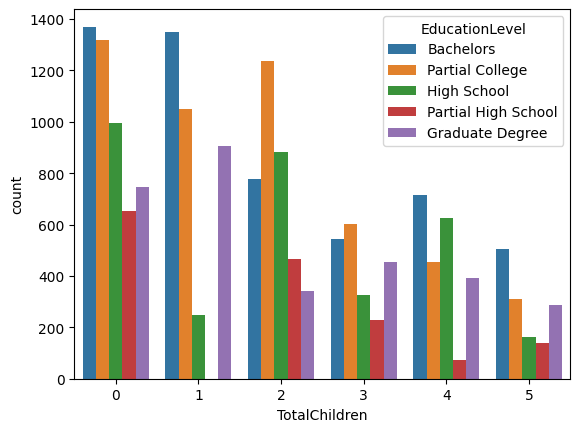

In [311]:
sns.countplot(x= 'TotalChildren', hue = 'EducationLevel', data = data)

In [312]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerKey,18148.0,20247.470465,5336.245656,11000.0,15626.75,20252.5,24868.25,29483.0
AnnualIncome,18148.0,57269.120564,32236.535573,10000.0,30000.00,60000.0,70000.00,170000.0
TotalChildren,18148.0,1.843619,1.613203,0.0,0.00,2.0,3.00,5.0


In [313]:
data.TotalChildren.mean()

1.8436191315847477

In [314]:
data['ChildrenAverage'] = data.TotalChildren.mean()

In [315]:
data.sample(4)

,CustomerKey,FirstName,LastName,Full Names,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,ChildrenAverage
8318,19481,DARREN,SUAREZ,MR. DARREN SUAREZ,15/05/1962,Married,Male,darren42@learnsector.com,30000,1,Partial College,Clerical,Yes,1.843619
6086,17201,VINCENT,YANG,MR. VINCENT YANG,21/11/1945,Single,Male,vincent5@learnsector.com,80000,5,Partial College,Professional,No,1.843619
2734,13789,JULIE,SHAN,MRS. JULIE SHAN,20/05/1965,Single,Female,julie15@learnsector.com,10000,4,Partial High School,Manual,Yes,1.843619
17767,29096,MARGARET,STEWART,MRS. MARGARET STEWART,2/10/1953,Married,Female,margaret6@learnsector.com,40000,2,Partial College,Skilled Manual,Yes,1.843619


In [316]:
data.groupby(['ChildrenAverage','EducationLevel']).size()

ChildrenAverage  EducationLevel     
1.843619         Bachelors              5261
                 Graduate Degree        3125
                 High School            3241
                 Partial College        4966
                 Partial High School    1555
dtype: int64

In [317]:
data.groupby(['ChildrenAverage','EducationLevel']).size().reset_index()

,ChildrenAverage,EducationLevel,0
0,1.843619,Bachelors,5261
1,1.843619,Graduate Degree,3125
2,1.843619,High School,3241
3,1.843619,Partial College,4966
4,1.843619,Partial High School,1555


<Axes: xlabel='ChildrenAverage', ylabel='count'>

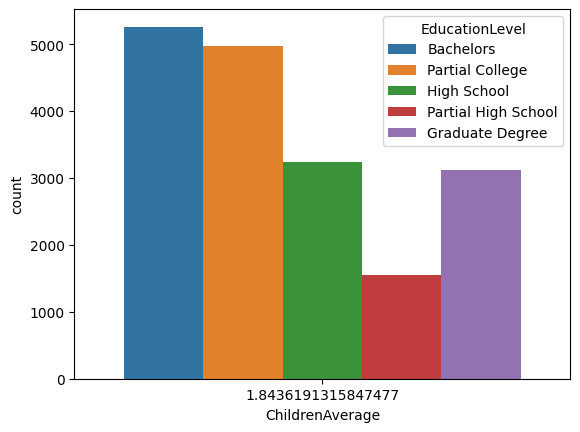

In [318]:
sns.countplot(x= 'ChildrenAverage', hue = 'EducationLevel', data = data)

<h2> Annual Income Average by Occupoation

In [319]:
data.AnnualIncome.mean()

57269.120564249504

In [320]:
data['AnnualIncomeAverage'] = data.AnnualIncome.mean()

In [321]:
data

,CustomerKey,FirstName,LastName,Full Names,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,ChildrenAverage,AnnualIncomeAverage
0,11000,JON,YANG,MR. JON YANG,4/8/1966,Married,Male,jon24@learnsector.com,90000,2,Bachelors,Professional,Yes,1.843619,57269.120564
1,11001,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,Single,Male,eugene10@learnsector.com,60000,3,Bachelors,Professional,No,1.843619,57269.120564
2,11002,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,Married,Male,ruben35@learnsector.com,60000,3,Bachelors,Professional,Yes,1.843619,57269.120564
3,11003,CHRISTY,ZHU,MS. CHRISTY ZHU,15/02/1968,Single,Female,christy12@learnsector.com,70000,0,Bachelors,Professional,No,1.843619,57269.120564
4,11004,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,8/8/1968,Single,Female,elizabeth5@learnsector.com,80000,5,Bachelors,Professional,Yes,1.843619,57269.120564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,TOMMY,TANG,MR. TOMMY TANG,7/4/1958,Married,Male,tommy2@learnsector.com,30000,1,Graduate Degree,Clerical,Yes,1.843619,57269.120564
18144,29480,NINA,RAJI,MRS. NINA RAJI,11/10/1960,Single,Female,nina21@learnsector.com,30000,3,Graduate Degree,Clerical,Yes,1.843619,57269.120564
18145,29481,IVAN,SURI,MR. IVAN SURI,1/5/1960,Single,Male,ivan0@learnsector.com,30000,3,Graduate Degree,Clerical,No,1.843619,57269.120564
18146,29482,CLAYTON,ZHANG,MR. CLAYTON ZHANG,3/5/1959,Married,Male,clayton0@learnsector.com,30000,3,Bachelors,Clerical,Yes,1.843619,57269.120564


In [322]:
data.groupby(['AnnualIncomeAverage','Occupation']).size()

AnnualIncomeAverage  Occupation    
57269.120564         Clerical          2859
                     Management        3011
                     Manual            2353
                     Professional      5424
                     Skilled Manual    4501
dtype: int64

In [323]:
data.groupby(['AnnualIncomeAverage','Occupation']).size().reset_index()

,AnnualIncomeAverage,Occupation,0
0,57269.120564,Clerical,2859
1,57269.120564,Management,3011
2,57269.120564,Manual,2353
3,57269.120564,Professional,5424
4,57269.120564,Skilled Manual,4501


<Axes: xlabel='Occupation', ylabel='count'>

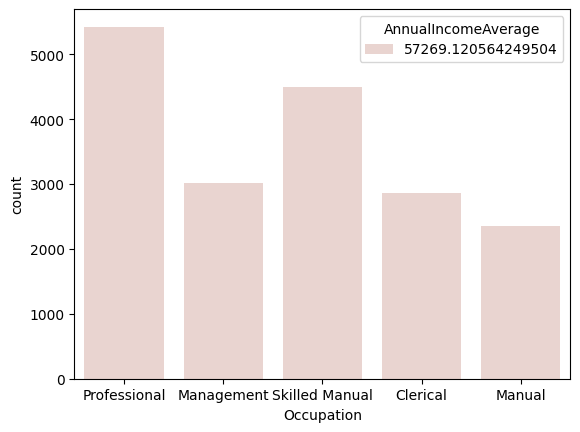

In [324]:
sns.countplot(x= 'Occupation', hue = 'AnnualIncomeAverage', data = data)

[]

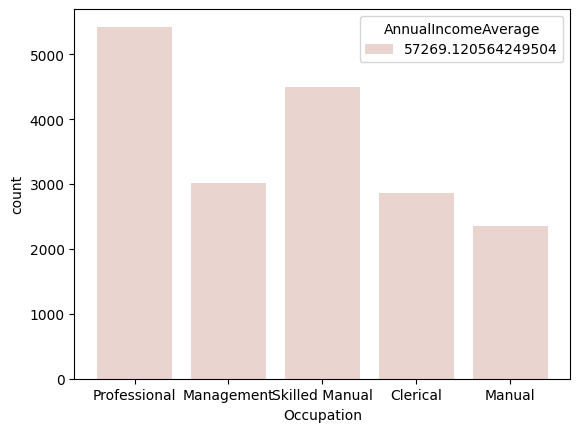

In [325]:
sns.countplot(x= 'Occupation', hue = 'AnnualIncomeAverage', data = data).plot(kind = 'bar')

<h2> Visualization of Customers Occupation

Text(0.5, 1.0, 'Customers occupation')

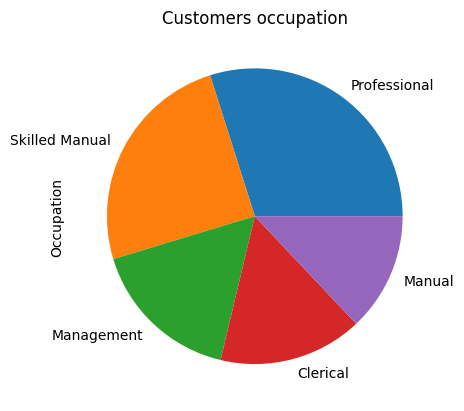

In [326]:
data.Occupation.value_counts().plot(kind = 'pie')
plt.title('Customers occupation')

<h2> Data Cleaning (date object to datetime)

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerKey          18148 non-null  int64  
 1   FirstName            18148 non-null  object 
 2   LastName             18148 non-null  object 
 3   Full Names           18148 non-null  object 
 4   BirthDate            18148 non-null  object 
 5   MaritalStatus        18148 non-null  object 
 6   Gender               18148 non-null  object 
 7   EmailAddress         18148 non-null  object 
 8   AnnualIncome         18148 non-null  int64  
 9   TotalChildren        18148 non-null  int64  
 10  EducationLevel       18148 non-null  object 
 11  Occupation           18148 non-null  object 
 12  HomeOwner            18148 non-null  object 
 13  ChildrenAverage      18148 non-null  float64
 14  AnnualIncomeAverage  18148 non-null  float64
dtypes: float64(2), int64(3), object(10)


In [328]:
pd.to_datetime(data.BirthDate)

<ipython-input-328-2f085b2da71e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(data.BirthDate)


0       1966-04-08
1       1965-05-14
2       1965-08-12
3       1968-02-15
4       1968-08-08
           ...    
18143   1958-07-04
18144   1960-11-10
18145   1960-01-05
18146   1959-03-05
18147   1959-12-08
Name: BirthDate, Length: 18148, dtype: datetime64[ns]

In [329]:
pd.to_datetime(data.BirthDate).info()

<ipython-input-329-da95446b7ec2>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(data.BirthDate).info()


<class 'pandas.core.series.Series'>
RangeIndex: 18148 entries, 0 to 18147
Series name: BirthDate
Non-Null Count  Dtype         
--------------  -----         
18148 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 141.9 KB


In [330]:
pd.to_datetime(data.BirthDate, format= '%d/%m/%Y')

0       1966-08-04
1       1965-05-14
2       1965-12-08
3       1968-02-15
4       1968-08-08
           ...    
18143   1958-04-07
18144   1960-10-11
18145   1960-05-01
18146   1959-05-03
18147   1959-08-12
Name: BirthDate, Length: 18148, dtype: datetime64[ns]

In [331]:
data.BirthDate = pd.to_datetime(data.BirthDate, format= '%d/%m/%Y')

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerKey          18148 non-null  int64         
 1   FirstName            18148 non-null  object        
 2   LastName             18148 non-null  object        
 3   Full Names           18148 non-null  object        
 4   BirthDate            18148 non-null  datetime64[ns]
 5   MaritalStatus        18148 non-null  object        
 6   Gender               18148 non-null  object        
 7   EmailAddress         18148 non-null  object        
 8   AnnualIncome         18148 non-null  int64         
 9   TotalChildren        18148 non-null  int64         
 10  EducationLevel       18148 non-null  object        
 11  Occupation           18148 non-null  object        
 12  HomeOwner            18148 non-null  object        
 13  ChildrenAverage      18148 non-

In [345]:
def age():
  current_year = 2024
  date = 'BirthDate'
  age = current_year - date
  return age


AttributeError: 'DataFrame' object has no attribute 'age'

<h2> Distinction between Home Owners and Non- Home Owners

In [333]:
data.HomeOwner .value_counts().reset_index()

,index,HomeOwner
0,Yes,12260
1,No,5888


Text(0, 0.5, 'Counts')

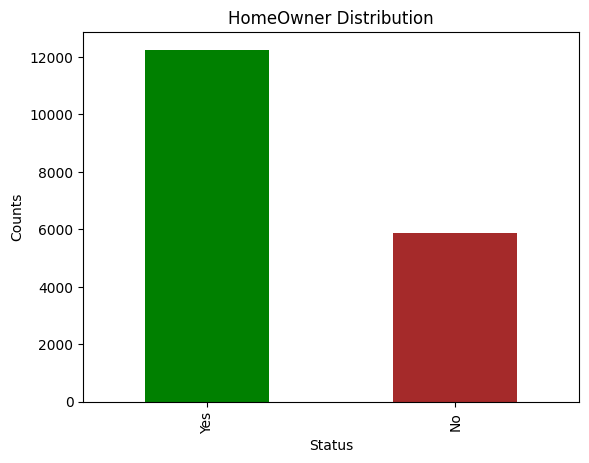

In [334]:
data.HomeOwner.value_counts().plot(kind = 'bar', color = ['green', 'brown'])
plt.title('HomeOwner Distribution')
plt.xlabel('Status')
plt.ylabel('Counts')

<h2> Chart Displaying Educational Level

In [335]:
data.EducationLevel .value_counts().reset_index()

,index,EducationLevel
0,Bachelors,5261
1,Partial College,4966
2,High School,3241
3,Graduate Degree,3125
4,Partial High School,1555


Text(0, 0.5, 'Counts')

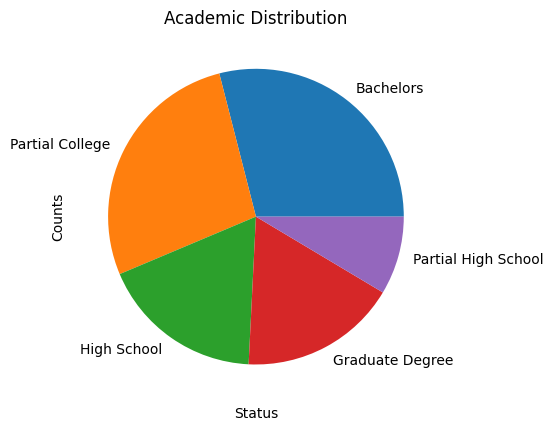

In [336]:
data.EducationLevel.value_counts().plot(kind = 'pie')
plt.title('Academic Distribution')
plt.xlabel('Status')
plt.ylabel('Counts')

<h2> Visualization of Total Children

In [337]:
data.TotalChildren.value_counts().reset_index(). T

,0,1,2,3,4,5
index,0,2,1,4,3,5
TotalChildren,5080,3703,3552,2259,2153,1401


Text(0, 0.5, 'Counts')

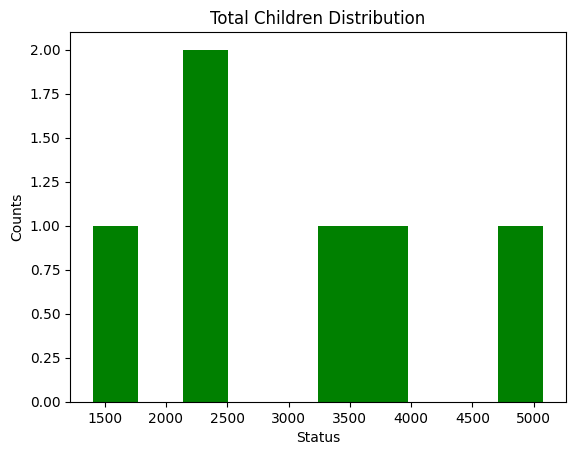

In [338]:
data.TotalChildren.value_counts().plot(kind = 'hist', color = ['green', 'pink', 'yellow', 'blue'])
plt.title('Total Children Distribution')
plt.xlabel('Status')
plt.ylabel('Counts')

In [349]:
data.TotalChildren.value_counts()

0    5080
2    3703
1    3552
4    2259
3    2153
5    1401
Name: TotalChildren, dtype: int64

Text(0, 0.5, 'Counts')

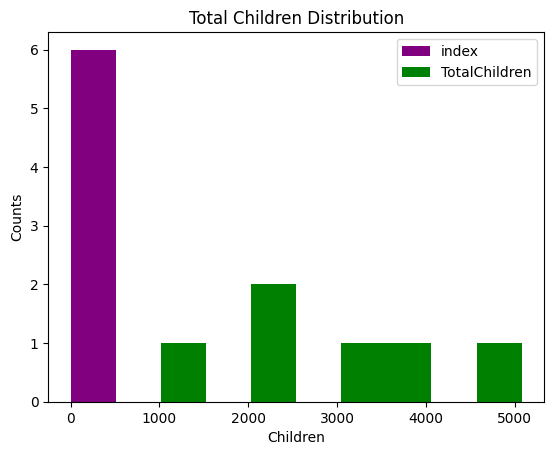

In [354]:
data.TotalChildren.value_counts().reset_index().plot(kind = 'hist', color = ['purple', 'green'])
plt.title('Total Children Distribution')
plt.xlabel('Children')
plt.ylabel('Counts')

[]

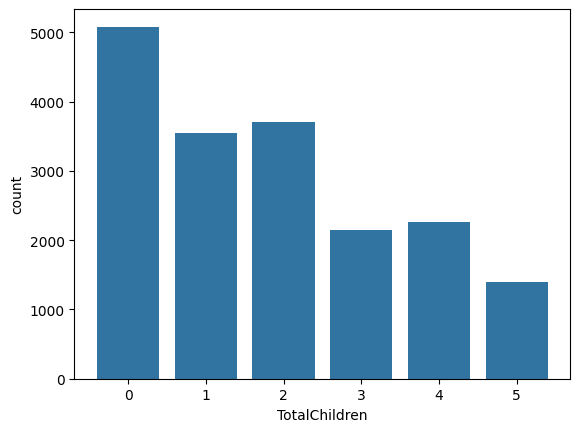

In [359]:
sns.countplot(x = 'TotalChildren', data = data).plot(kind = 'hist')

<h2> Marital Status by Occupation

In [361]:
data.groupby(['MaritalStatus','Occupation']).size().reset_index().T

,0,1,2,3,4,5,6,7,8,9
MaritalStatus,Married,Married,Married,Married,Married,Single,Single,Single,Single,Single
Occupation,Clerical,Management,Manual,Professional,Skilled Manual,Clerical,Management,Manual,Professional,Skilled Manual
0,1407,1888,791,3062,2669,1452,1123,1562,2362,1832


<Axes: >

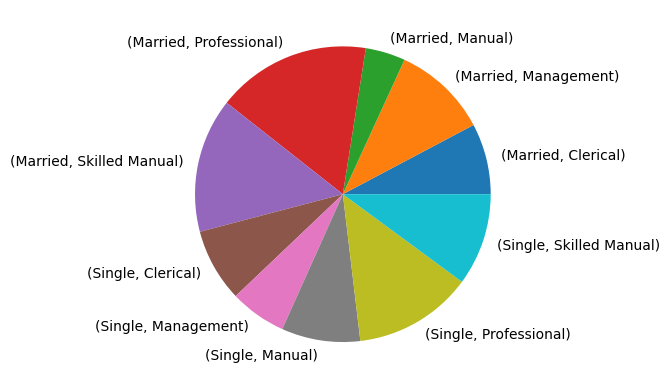

In [366]:
data.groupby(['MaritalStatus','Occupation']).size().plot(kind = 'pie')

<h2> Visualization of Gender by Education level

<h2>

In [365]:
data.groupby(['Gender','EducationLevel']).size().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Gender,Female,Female,Female,Female,Female,Females,Females,Females,Females,Females,Male,Male,Male,Male,Male
EducationLevel,Bachelors,Graduate Degree,High School,Partial College,Partial High School,Bachelors,Graduate Degree,High School,Partial College,Partial High School,Bachelors,Graduate Degree,High School,Partial College,Partial High School
0,2564,1567,1555,2465,741,32,22,18,43,15,2665,1536,1668,2458,799


<Axes: xlabel='Gender,EducationLevel'>

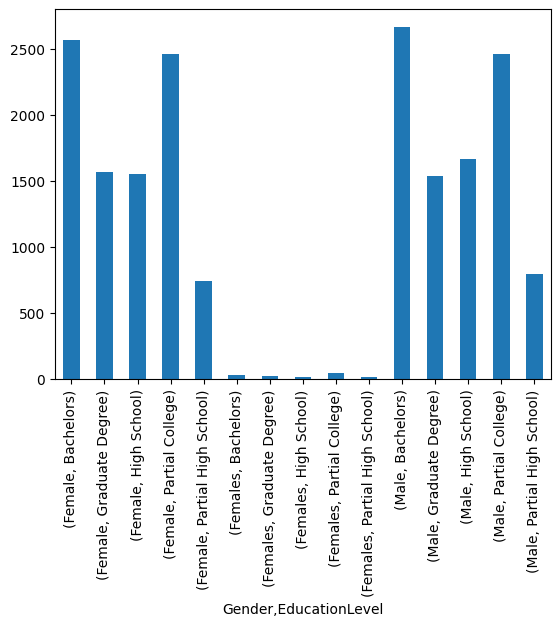

In [367]:
data.groupby(['Gender','EducationLevel']).size().plot(kind = 'bar')

<h2> Children Average by Income Range

In [370]:
data.groupby(['ChildrenAverage','AnnualIncome']).size().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
ChildrenAverage,1.843619,1.843619,1.843619,1.843619,1.843619,1.843619,1.843619,1.843619,1.843619,1.843619,1.843619,1.843619,1.843619,1.843619,1.843619,1.843619
AnnualIncome,10000.000000,20000.000000,30000.000000,40000.000000,50000.000000,60000.000000,70000.000000,80000.000000,90000.000000,100000.000000,110000.000000,120000.000000,130000.000000,150000.000000,160000.000000,170000.000000
0,1135.000000,1745.000000,2236.000000,2688.000000,661.000000,3072.000000,2313.000000,1325.000000,830.000000,559.000000,459.000000,324.000000,501.000000,100.000000,91.000000,109.000000


<Axes: xlabel='ChildrenAverage,AnnualIncome'>

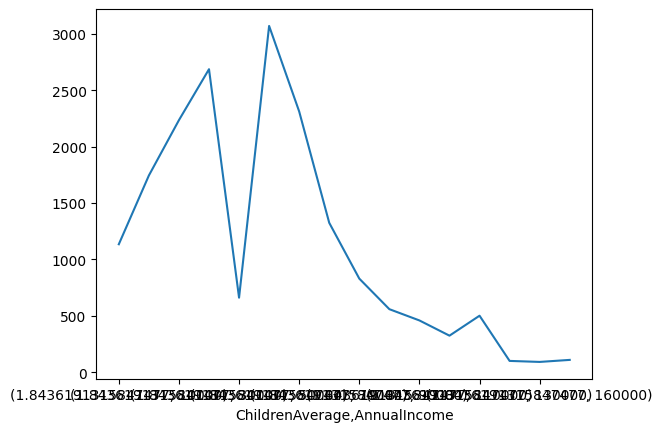

In [371]:
data.groupby(['ChildrenAverage','AnnualIncome']).size().plot(kind = 'line')

<h2> Home Owners vs Marital Status

In [373]:
data.groupby(['HomeOwner','MaritalStatus']).size().reset_index()

,HomeOwner,MaritalStatus,0
0,No,Married,1816
1,No,Single,4072
2,Yes,Married,8001
3,Yes,Single,4259


<Axes: >

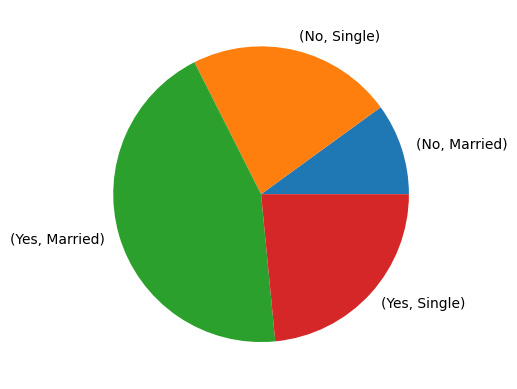

In [374]:
data.groupby(['HomeOwner','MaritalStatus']).size().plot(kind = 'pie')

<h2> Visualization of Months

In [383]:
data.BirthDate.dt.month.reset_index()

,index,BirthDate
0,0,8
1,1,5
2,2,12
3,3,2
4,4,8
...,...,...
18143,18143,4
18144,18144,10
18145,18145,5
18146,18146,5


In [388]:
data['BirthMonth'] = data.BirthDate.dt.month
data.sample(4)

,CustomerKey,FirstName,LastName,Full Names,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,ChildrenAverage,AnnualIncomeAverage,Birth Months,BirthMonth
9811,21005,BARBARA,ZHU,MRS. BARBARA ZHU,1960-02-27,Married,Female,barbara23@learnsector.com,10000,1,High School,Manual,Yes,1.843619,57269.120564,2,2
17447,28771,KATHERINE,RUSSELL,MRS. KATHERINE RUSSELL,1954-08-08,Single,Female,katherine46@learnsector.com,20000,3,Partial High School,Manual,No,1.843619,57269.120564,8,8
18070,29404,CHLOE,ROSS,MRS. CHLOE ROSS,1963-06-05,Single,Female,chloe70@learnsector.com,30000,3,Partial College,Clerical,No,1.843619,57269.120564,6,6
10312,21513,STACEY,XU,MRS. STACEY XU,1944-04-26,Married,Female,stacey13@learnsector.com,70000,5,High School,Professional,Yes,1.843619,57269.120564,4,4


<Axes: >

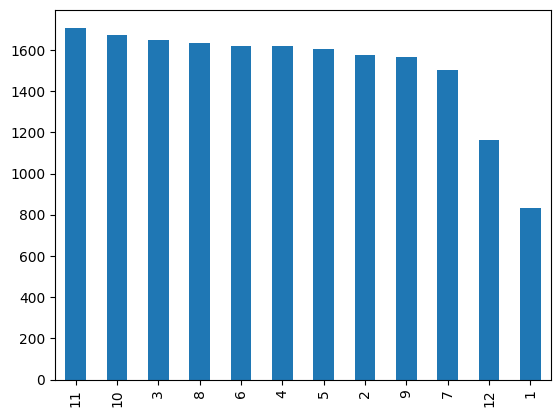

In [390]:
data.BirthMonth.value_counts().plot(kind = 'bar')

<h2>  Occupation vs Income Range

In [392]:
data.groupby(['Occupation','AnnualIncome']).size().reset_index()

,Occupation,AnnualIncome,0
0,Clerical,10000,84
1,Clerical,20000,510
2,Clerical,30000,1388
3,Clerical,40000,877
4,Management,40000,126
5,Management,50000,128
6,Management,60000,420
7,Management,70000,420
8,Management,80000,359
9,Management,90000,187


Text(0.5, 1.0, 'Occupation/Income Range')

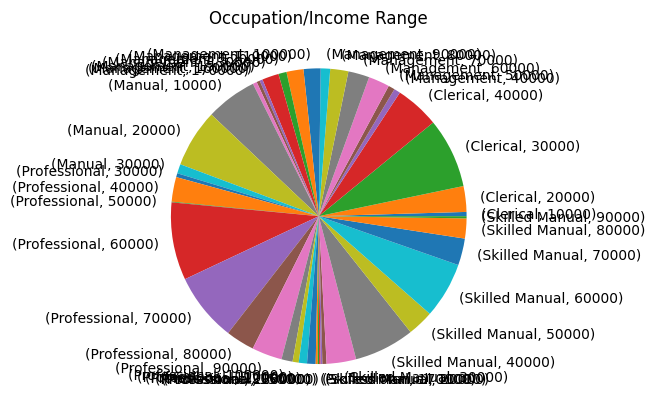

In [394]:
data.groupby(['Occupation','AnnualIncome']).size().plot(kind = 'pie')
plt.title('Occupation/Income Range')

<h2> Education Level Frequency

In [396]:
data.EducationLevel.value_counts().reset_index()

,index,EducationLevel
0,Bachelors,5261
1,Partial College,4966
2,High School,3241
3,Graduate Degree,3125
4,Partial High School,1555


<Axes: >

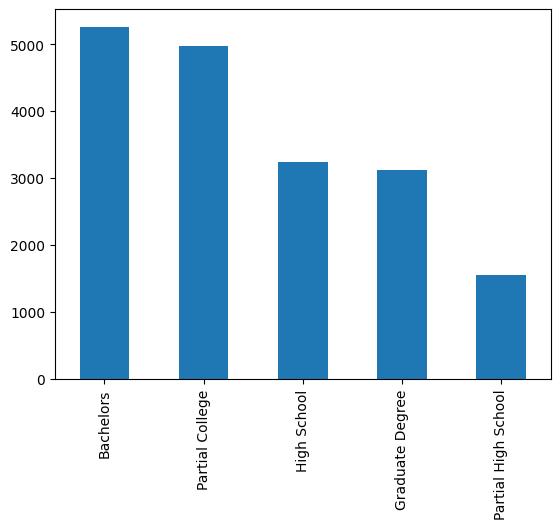

In [397]:
data.EducationLevel.value_counts().plot(kind = 'bar')